In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy as sp
import output_processing as op

/Users/ab-purushothama-macbook/.conda/envs/prej-prompt/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# Sample Figures with One Model

In [9]:
models= [
   "meta-llama/Llama-3.2-1B",
    "meta-llama/Llama-3.2-1B-Instruct",
    "meta-llama/Llama-3.2-3B",
    "meta-llama/Llama-3.2-3B-Instruct",
    "meta-llama/Llama-3.1-8B",
    "meta-llama/Llama-3.1-8B-Instruct",
    "gpt2-medium",
    "allenai/OLMo-2-1124-7B-Instruct",
    "mistralai/Ministral-8B-Instruct-2410",
    "google/gemma-7b-it"
]
def read_and_organize_model_results(model_name):
    model_results = pd.read_csv(f"runs/runs-42/{model_name}-results.csv")
    model_results.replace([0.0], -65504, inplace=True)
    model_results = op.organize_distribution(model_results)
    model_results["model_name"] = model_name.split("/")[-1]
    model_results.loc[model_results["Covered"] == True, "Judgment"] = "Covered"
    model_results.loc[model_results["Covered"] == True, "Judgment_prob"] = model_results["Covered_prob"]
    model_results.loc[model_results["NotCovered"] == True, "Judgment"] = "NotCovered"
    model_results.loc[model_results["NotCovered"] == True, "Judgment_prob"] = model_results["NotCovered_prob"]
    print(model_name, model_results.output.value_counts())
    return model_results
    
combined_results = [read_and_organize_model_results(model_name) for model_name in models]
combined_df = pd.concat(combined_results).reset_index()
combined_df.loc[:, "item"] = combined_df["title"] + ["version"]
combined_df.shape

meta-llama/Llama-3.2-1B output
yes       565
"         255
B         165
A         111
Yes        85
it         48
Harper      7
No          6
Name: count, dtype: int64
meta-llama/Llama-3.2-1B-Instruct output
yes    768
B      267
No     161
        17
\n      11
Yes      9
A        9
Name: count, dtype: int64
meta-llama/Llama-3.2-3B output
yes    846
B      260
no     112
A       14
No       7
C        2
\n       1
Name: count, dtype: int64
meta-llama/Llama-3.2-3B-Instruct output
yes    822
B      259
No      91
no      47
A       17
\n       6
Name: count, dtype: int64
meta-llama/Llama-3.1-8B output
yes    790
B      184
no     176
A       92
Name: count, dtype: int64
meta-llama/Llama-3.1-8B-Instruct output
no     617
yes    272
B      226
No      67
A       50
Yes     10
Name: count, dtype: int64
gpt2-medium output
yes      580
no       253
A        201
"        133
B         71
Genie      3
No         1
Name: count, dtype: int64
allenai/OLMo-2-1124-7B-Instruct output
no      732
ye

(12420, 24)

In [10]:
combined_df.sample()

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,Yes_probs,No_probs,...,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,Judgment,Judgment_prob,item
3611,1127,Fire,options_flipped,"Fatema's home insurance covers ""Fire"" damage, ...",controversial,B,B.,NaN,0.000638,0.000571,...,0.253217,0.558327,0.441673,True,False,0.906352,Llama-3.2-3B,Covered,0.558327,Fireversion


In [204]:
combined_df

,index,title,prompt_type,prompt,version,output,output_text,cum_logprob,Yes_probs,No_probs,...,UnAff_prob,Covered_prob,NotCovered_prob,Covered,NotCovered,entropy,model_name,Covered_Num,NotCovered_Num,item
0,0,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_uncovered,yes,yes.,NaN,0.091553,1.201434e-01,...,0.120143,0.432474,0.567526,False,True,0.660997,Llama-3.2-1B-Instruct,0.0,1.0,Emergency Damages Iversion
1,1,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",unambiguous_covered,yes,yes.,NaN,0.102318,1.177668e-01,...,0.117767,0.464902,0.535098,False,True,0.679023,Llama-3.2-1B-Instruct,0.0,1.0,Emergency Damages Iversion
2,2,Emergency Damages I,yes_or_no,"Joanne's home insurance covers ""Emergency Dama...",controversial,yes,yes.,NaN,0.096133,1.196393e-01,...,0.119639,0.445530,0.554470,False,True,0.669783,Llama-3.2-1B-Instruct,0.0,1.0,Emergency Damages Iversion
3,3,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_uncovered,yes,yes.,NaN,0.114646,7.402081e-02,...,0.074021,0.607663,0.392337,True,False,0.610649,Llama-3.2-1B-Instruct,1.0,0.0,Emergency Damages IIversion
4,4,Emergency Damages II,yes_or_no,"Salma's home insurance covers ""Emergency Damag...",unambiguous_covered,yes,yes.,NaN,0.114434,8.171626e-02,...,0.081716,0.583400,0.416600,True,False,0.628239,Llama-3.2-1B-Instruct,1.0,0.0,Emergency Damages IIversion
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8689,1237,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,0.000139,1.979552e-06,...,0.043603,0.880797,0.119203,True,False,0.678960,gemma-7b-it,1.0,0.0,Vehicle Glass Iversion
8690,1238,Vehicle Glass I,options_flipped,Ahmad's car insurance policy includes coverage...,controversial,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe t...,NaN,0.000153,2.898802e-06,...,0.030161,0.777300,0.222700,True,False,0.428779,gemma-7b-it,1.0,0.0,Vehicle Glass Iversion
8691,1239,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_uncovered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,0.000235,2.032128e-06,...,0.034860,0.880797,0.119203,True,False,0.617459,gemma-7b-it,1.0,0.0,Vehicle Glass IIversion
8692,1240,Vehicle Glass II,options_flipped,Aneesh's car insurance policy includes coverag...,unambiguous_covered,\n\n,\n\n**Answer:** B\n\n**Explanation:**\n\nThe p...,NaN,0.000227,1.556757e-06,...,0.034290,0.924142,0.075858,True,False,0.703792,gemma-7b-it,1.0,0.0,Vehicle Glass IIversion


# TODO * This with another figure showing the items for which it matches human majority judgement

/Users/ab-purushothama-macbook/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 6.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ab-purushothama-macbook/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 10.6% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ab-purushothama-macbook/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 9.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ab-purushothama-macbook/.local/lib/python3.10/site-packages/seaborn/categorical.py:3399: UserWarning: 5.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/Users/ab-p

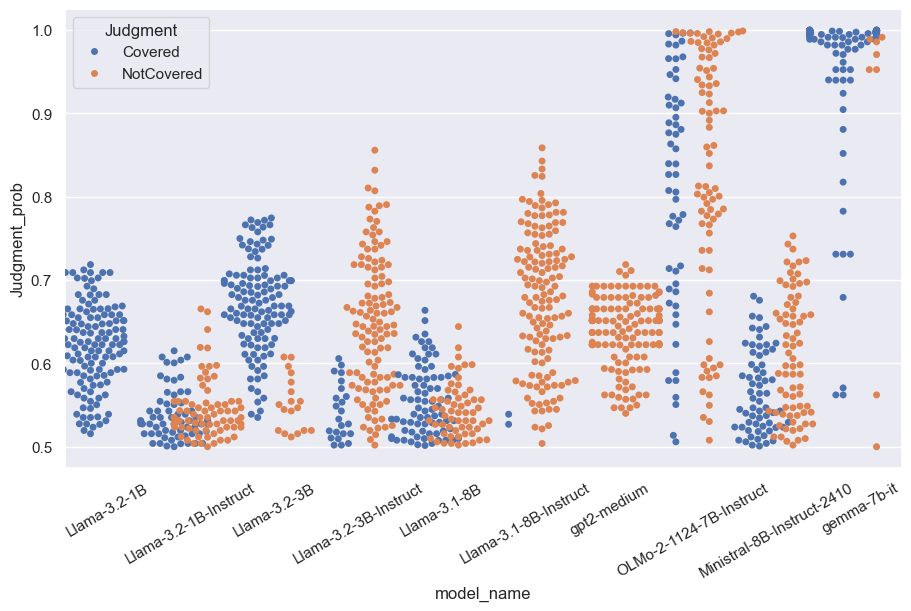

In [61]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")

prompt_type_mask = combined_df["prompt_type"] == "yes_or_no"
data_df = combined_df[prompt_type_mask]

covered_mask = data_df["Judgment"] == "Covered"
not_covered_mask = data_df["Judgment"] == "NotCovered"
# p = sns.stripplot(x='model_name', y='Judgment_prob',  hue='Judgment', jitter=True, dodge=True, data=data_df)
p = sns.swarmplot(x='model_name', y='Judgment_prob',  hue='Judgment',  data=data_df, size=1)

In [94]:
by_model_prompt_type = combined_df.groupby(['prompt_type', 'model_name'],as_index=False, sort=False).aggregate({'Covered_Num': "sum", 'NotCovered_Num': "sum"})
by_model_prompt_type.loc[:, "Majority_Proportion"] = by_model_prompt_type[["Covered_Num", "NotCovered_Num"]].max(axis=1)
by_model_prompt_type.loc[:, "Majority_Proportion"] = by_model_prompt_type["Majority_Proportion"].apply(lambda x: x/138)

In [95]:
by_model_prompt_type

,prompt_type,model_name,Covered_Num,NotCovered_Num,Majority_Proportion
0,yes_or_no,Llama-3.2-1B-Instruct,66.0,72.0,0.521739
1,no_or_yes,Llama-3.2-1B-Instruct,0.0,138.0,1.000000
2,negation,Llama-3.2-1B-Instruct,109.0,29.0,0.789855
3,agreement,Llama-3.2-1B-Instruct,0.0,138.0,1.000000
4,agreement_negation,Llama-3.2-1B-Instruct,138.0,0.0,1.000000
...,...,...,...,...,...
58,agreement_negation,gemma-7b-it,138.0,0.0,1.000000
59,disagreement,gemma-7b-it,16.0,122.0,0.884058
60,disagreement_negation,gemma-7b-it,4.0,134.0,0.971014
61,options,gemma-7b-it,138.0,0.0,1.000000


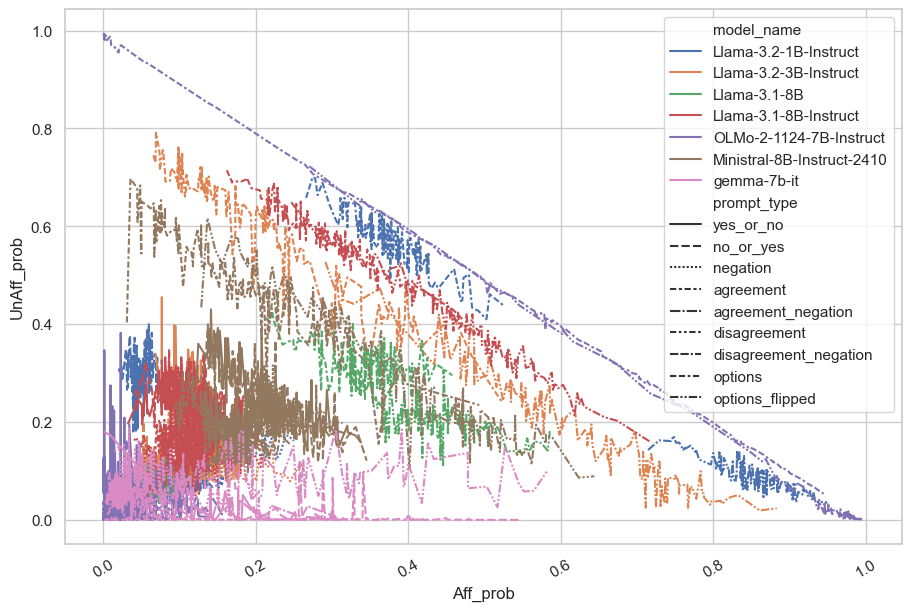

In [197]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="whitegrid")
p = sns.lineplot(x='Aff_prob', y='UnAff_prob', hue='model_name', style='prompt_type', data=combined_df)
plt.show()

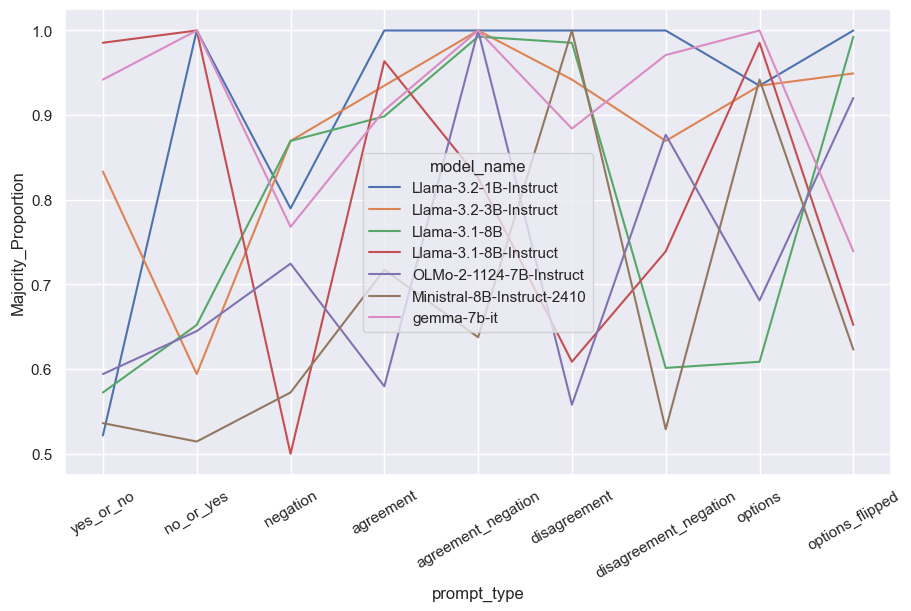

In [203]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
sns.lineplot(x='prompt_type', y = 'Majority_Proportion', hue='model_name', data=by_model_prompt_type)
plt.show()

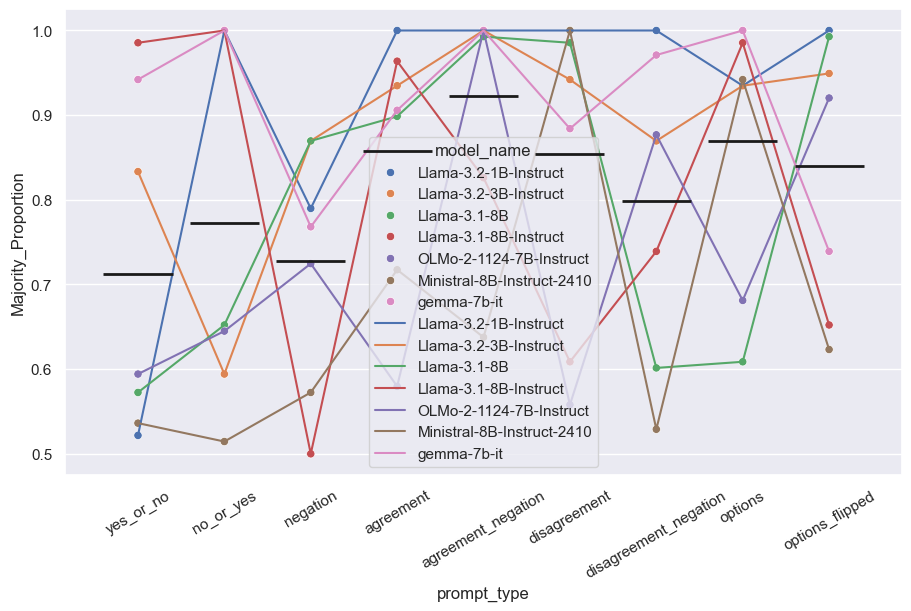

In [180]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
p = sns.scatterplot(x='prompt_type', y='Majority_Proportion', hue='model_name', data=by_model_prompt_type)
sns.boxplot(showmeans=True,
            meanline=True,
            meanprops={'color': 'k', 'ls': '-', 'lw': 2},
            medianprops={'visible': False},
            whiskerprops={'visible': False},
            zorder=10,
            x="prompt_type",
            y="Majority_Proportion",
            data=by_model_prompt_type,
            showfliers=False,
            showbox=False,
            showcaps=False,
            ax=p)
sns.relplot(x='prompt_type', y = 'Majority_Proportion', hue='model_name', data=by_model_prompt_type, kind='line', ax=ax)
# Put lines for each hue/lighted
plt.show()

In [ ]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
p = sns.scatterplot(x='prompt_type', y='Majority_Proportion', hue='model_name', data=by_model_prompt_type)
plt.show()

# Model response distribution

# Human respones

In [109]:
human_responses = pd.read_csv("data/human/main-merged.csv")
human_responses.sample()

,workerid,proliferate.condition,confidence,continuation,header,individual_judgment,item,population_judgment,slide_number_in_experiment,time,...,subject_information.language,subject_information.legaltraining,subject_information.problems,subject_information.race,system.Browser,system.OS,system.screenH,system.screenW,time_in_minutes,error
3639,1354,condition1,3,Denise is moving to a new home on the other si...,"Denise's insurance covers damage from ""House R...",no,House Removal,94,3,48545,...,English,0,No,White,Chrome,Windows,720,1280,2.4634,NaN


In [116]:
human_responses.shape

(4140, 31)

In [118]:
len(human_responses.workerid.unique())

1378

In [110]:
human_responses.loc[human_responses['individual_judgment'] == 'yes', 'yes_judgement'] = 1
human_responses.loc[human_responses['individual_judgment'] != 'yes', 'yes_judgement'] = 0

human_responses.loc[human_responses['individual_judgment'] == 'no', 'no_judgement'] = 1
human_responses.loc[human_responses['individual_judgment'] != 'no', 'no_judgement'] = 0

In [134]:
item_level_judgments = human_responses.groupby(['item', 'version'], as_index=False, sort=False).aggregate({
    'yes_judgement': 'sum', 
    'no_judgement': 'sum'
})
item_level_judgments.loc[:, 'item_name'] =  item_level_judgments["item"] + item_level_judgments["version"]

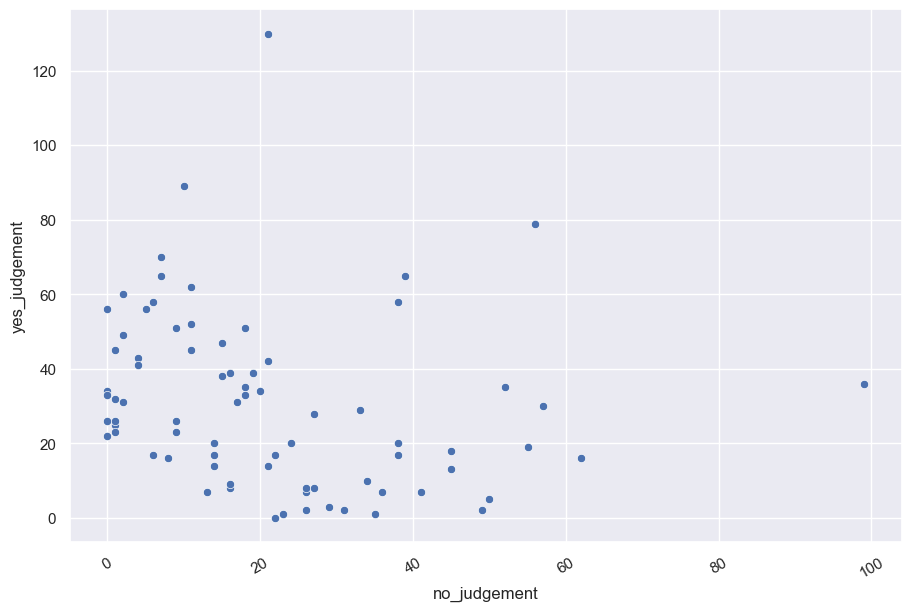

In [141]:
fig, ax = plt.subplots(figsize=(9,6), layout='constrained')
plt.xticks(rotation=30)
sns.set_theme(style="darkgrid")
p = sns.scatterplot(x='no_judgement', y='yes_judgement', data=item_level_judgments)